In [ ]:
%pylab inline

# **Mejor caso de 4 parejas**

In [37]:
import pandas as pd
import numpy as np
from collections import Counter
from copy import copy
#Populating the interactive namespace from numpy and matplotlib
#Define men and women data frames
man_list = ['a', 'b', 'c', 'd']
women_list = ['A', 'B', 'C', 'D']
women_df = pd.DataFrame({'A': [3,4,2,1], 'B': [3,1,4,2], 'C':[2,3,4,1], 'D':[3,2,1,4]})
women_df.index = man_list
man_df = pd.DataFrame({'A': [1,1,2,4], 'B': [2,4,1,2], 'C':[3,3,3,3], 'D':[4,2,4,1]})
man_df.index = man_list
women_df
man_df
#Gale-Shapley algorithm
# dict to control which women each man can make proposals
women_available = {man:women_list for man in man_list}
# waiting list of men that were able to create pair on each iteration
waiting_list = []
# dict to store created pairs
proposals = {}
# variable to count number of iterations
count = 0
# while not all men have pairs
while len(waiting_list)<len(man_list):
    # man makes proposals
    for man in man_list:
        if man not in waiting_list:
            # each man make proposal to the top women from it's list
            women = women_available[man]
            best_choice = man_df.loc[man][man_df.loc[man].index.isin(women)].idxmin()
            proposals[(man, best_choice)]=(man_df.loc[man][best_choice],
                                                 women_df.loc[man][best_choice])
    # if women have more than one proposals 
    # she will choose the best option
    overlays = Counter([key[1] for key in proposals.keys()])
    # cycle to choose the best options
    for women in overlays.keys():
        if overlays[women]>1:
            # pairs to drop from proposals
            pairs_to_drop = sorted({pair: proposals[pair] for pair in proposals.keys() 
                    if women in pair}.items(), 
                   key=lambda x: x[1][1]
                  )[1:]
            # if man was rejected by woman
            # there is no pint for him to make proposal 
            # second time to the same woman
            for p_to_drop in pairs_to_drop:
                del proposals[p_to_drop[0]]
                _women = copy(women_available[p_to_drop[0][0]])
                _women.remove(p_to_drop[0][1])
                women_available[p_to_drop[0][0]] = _women
    # man who successfully created pairs must be added to the waiting list 
    waiting_list = [man[0] for man in proposals.keys()]
    # update counter
    count+=1


In [38]:
women_df

,A,B,C,D
a,3,3,2,3
b,4,1,3,2
c,2,4,4,1
d,1,2,1,4


In [39]:
man_df

,A,B,C,D
a,1,2,3,4
b,1,4,3,2
c,2,1,3,4
d,4,2,3,1


In [40]:
proposals

{('a', 'C'): (3, 2),
 ('b', 'D'): (2, 2),
 ('c', 'A'): (2, 2),
 ('d', 'B'): (2, 2)}

In [41]:
count

6

# **Peor caso de 4 parejas**

In [127]:
import pandas as pd
import numpy as np
from collections import Counter
from copy import copy

def ran():
  pref = [1,2,3,4]
  random.shuffle(pref)
  return list(pref)

mujer = []
for i in range(len(man_list)):
  mujer.append(ran())


def sel(num):
  global mujer
  ret = []
  for i in range(len(mujer)):
    ret.append(mujer[i][num])
  return ret



#Populating the interactive namespace from numpy and matplotlib
#Define men and women data frames
pref = [1,2,3,4]

man_list = ['a', 'b', 'c', 'd']
women_list = ['A', 'B', 'C', 'D']
women_df = pd.DataFrame({'A': ran(), 'B': ran(), 'C':ran(), 'D':ran()})
women_df.index = man_list


man_df = pd.DataFrame({'A':sel(0), 'B':sel(1), 'C':sel(2), 'D':sel(3)})
man_df.index = man_list
women_df
man_df
#Gale-Shapley algorithm
# dict to control which women each man can make proposals
women_available = {man:women_list for man in man_list}
# waiting list of men that were able to create pair on each iteration
waiting_list = []
# dict to store created pairs
proposals = {}
# variable to count number of iterations
count = 0
# while not all men have pairs
while len(waiting_list)<len(man_list):
    # man makes proposals
    for man in man_list:
        if man not in waiting_list:
            # each man make proposal to the top women from it's list
            women = women_available[man]
            best_choice = man_df.loc[man][man_df.loc[man].index.isin(women)].idxmax()
            proposals[(man, best_choice)]=(man_df.loc[man][best_choice],
                                                 women_df.loc[man][best_choice])
    # if women have more than one proposals 
    # she will choose the best option
    overlays = Counter([key[1] for key in proposals.keys()])
    # cycle to choose the best options
    for women in overlays.keys():
        if overlays[women]>len(man_list):
            # pairs to drop from proposals
            pairs_to_drop = sorted({pair: proposals[pair] for pair in proposals.keys() 
                    if women in pair}.items(), 
                   key=lambda x: x[1][1]
                  )[1:]
            # if man was rejected by woman
            # there is no pint for him to make proposal 
            # second time to the same woman
            for p_to_drop in pairs_to_drop:
                del proposals[p_to_drop[0]]
                _women = copy(women_available[p_to_drop[0][0]])
                _women.remove(p_to_drop[0][1])
                women_available[p_to_drop[0][0]] = _women
    # man who successfully created pairs must be added to the waiting list 
    waiting_list = [man[0] for man in proposals.keys()]
    # update counter
    count+=1


In [128]:
women_df

,A,B,C,D
a,3,1,4,1
b,1,2,2,2
c,4,3,3,4
d,2,4,1,3


In [129]:
man_df

,A,B,C,D
a,3,4,2,1
b,3,4,2,1
c,4,3,1,2
d,4,1,3,2


In [130]:
proposals

{('a', 'B'): (4, 1),
 ('b', 'B'): (4, 2),
 ('c', 'A'): (4, 4),
 ('d', 'A'): (4, 2)}

# **100 ejecuciones aleatorias cn 4 parejas**

3
{('a', 'C'): (1, 2), ('b', 'A'): (1, 1), ('d', 'D'): (2, 1), ('c', 'B'): (3, 2)}
3
{('a', 'C'): (1, 2), ('b', 'A'): (1, 1), ('d', 'D'): (2, 2), ('c', 'B'): (3, 4)}
2
{('a', 'C'): (1, 3), ('d', 'A'): (1, 2), ('b', 'B'): (2, 2), ('c', 'D'): (2, 2)}
2
{('a', 'C'): (1, 1), ('d', 'A'): (1, 1), ('b', 'B'): (2, 2), ('c', 'D'): (2, 3)}
3
{('a', 'C'): (1, 1), ('b', 'A'): (1, 1), ('d', 'D'): (2, 2), ('c', 'B'): (3, 1)}
2
{('a', 'C'): (1, 1), ('d', 'A'): (1, 1), ('b', 'B'): (2, 3), ('c', 'D'): (2, 4)}
3
{('a', 'C'): (1, 1), ('b', 'A'): (1, 1), ('d', 'D'): (2, 1), ('c', 'B'): (3, 4)}
2
{('a', 'C'): (1, 1), ('d', 'A'): (1, 1), ('b', 'B'): (2, 1), ('c', 'D'): (2, 2)}
3
{('c', 'C'): (1, 3), ('a', 'A'): (2, 1), ('d', 'D'): (2, 1), ('b', 'B'): (2, 1)}
4
{('a', 'C'): (1, 1), ('b', 'A'): (1, 2), ('c', 'D'): (2, 3), ('d', 'B'): (4, 2)}
6
{('b', 'A'): (1, 1), ('d', 'C'): (3, 1), ('c', 'D'): (2, 1), ('a', 'B'): (4, 3)}
3
{('c', 'C'): (1, 1), ('a', 'A'): (2, 1), ('d', 'D'): (2, 2), ('b', 'B'): (2, 4)}
2
{(

<BarContainer object of 10 artists>

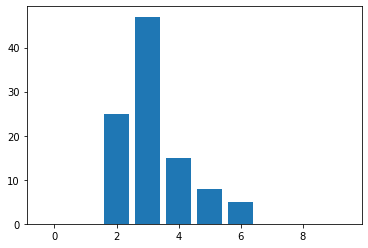

In [166]:
import pandas as pd
import numpy as np
from collections import Counter
from copy import copy
import matplotlib.pyplot as plt

cont = [0,0,0,0,0,0,0,0,0,0]
nom = [0,1,2,3,4,5,6,7,8,9]

def ran():
  pref = [1,2,3,4]
  random.shuffle(pref)
  return list(pref)

mujer = []
for i in range(len(man_list)):
  mujer.append(ran())


def sel(num):
  global mujer
  ret = []
  for i in range(len(mujer)):
    ret.append(mujer[i][num])
  return ret


for k in range(100):
    
  #Populating the interactive namespace from numpy and matplotlib
  #Define men and women data frames
  man_list = ['a', 'b', 'c', 'd']
  women_list = ['A', 'B', 'C', 'D']
  women_df = pd.DataFrame({'A': ran(), 'B': ran(), 'C':ran(), 'D':ran()})
  women_df.index = man_list
  man_df = pd.DataFrame({'A':sel(0), 'B':sel(1), 'C':sel(2), 'D':sel(3)})
  man_df.index = man_list
  women_df
  man_df
  #Gale-Shapley algorithm
  # dict to control which women each man can make proposals
  women_available = {man:women_list for man in man_list}
  # waiting list of men that were able to create pair on each iteration
  waiting_list = []
  # dict to store created pairs
  proposals = {}
  # variable to count number of iterations
  count = 0
  # while not all men have pairs
  while len(waiting_list)<len(man_list):
      # man makes proposals
      for man in man_list:
          if man not in waiting_list:
              # each man make proposal to the top women from it's list
              women = women_available[man]
              best_choice = man_df.loc[man][man_df.loc[man].index.isin(women)].idxmin()
              proposals[(man, best_choice)]=(man_df.loc[man][best_choice],
                                                  women_df.loc[man][best_choice])
      # if women have more than one proposals 
      # she will choose the best option
      overlays = Counter([key[1] for key in proposals.keys()])
      # cycle to choose the best options
      for women in overlays.keys():
          if overlays[women]>1:
              # pairs to drop from proposals
              pairs_to_drop = sorted({pair: proposals[pair] for pair in proposals.keys() 
                      if women in pair}.items(), 
                    key=lambda x: x[1][1]
                    )[1:]
              # if man was rejected by woman
              # there is no pint for him to make proposal 
              # second time to the same woman
              for p_to_drop in pairs_to_drop:
                  del proposals[p_to_drop[0]]
                  _women = copy(women_available[p_to_drop[0][0]])
                  _women.remove(p_to_drop[0][1])
                  women_available[p_to_drop[0][0]] = _women
      # man who successfully created pairs must be added to the waiting list 
      waiting_list = [man[0] for man in proposals.keys()]
      # update counter
      count+=1
  cont[count] += 1
  print(count)
  print(proposals)
print (cont)
for i in range(len(cont)):
  if cont[i] != 0:
    min = i
    break
for i in range(len(cont)):
  if cont[-i] != 0:
    max = len(cont) - i
    break
prom = 0
for i in range(len(cont)):
  prom += i * int(cont[i])

print('\n')
print('Iteraciones minimas = '+ str(min))
print('\n')
print('Iteraciones maximas = '+ str(max))
print('\n')
print('Iteraciones promedio = '+ str(prom/100))
print('\n')
plt.bar(nom,cont)

# **Mejor caso de 40 parejas**

In [132]:
import pandas as pd
import numpy as np
from collections import Counter
from copy import copy
import matplotlib.pyplot as plt

cont = [0,0,0,0,0,0,0,0,0,0]
nom = [0,1,2,3,4,5,6,7,8,9]

def ran():
  pref = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40]
  random.shuffle(pref)
  return list(pref)

mujer = []
for i in range(len(man_list)):
  mujer.append(ran())


def sel(num):
  global mujer
  ret = []
  for i in range(len(mujer)):
    ret.append(mujer[i][num])
  return ret

#Populating the interactive namespace from numpy and matplotlib
#Define men and women data frames
man_list = ['a0', 'b0', 'c0', 'd0','e0','f0','g0','h0','i0','j0','k0','l0','m0','n0','o0','p0','q0','r0','s0','t0','a1', 'b1', 'c1', 'd1','e1','f1','g1','h1','i1','j1','k1','l1','m1','n1','o1','p1','q1','r1','s1','t1']
women_list = ['A0', 'B0', 'C0', 'D0','E0','F0','G0','H0','I0','J0','K0','L0','M0','N0','O0','P0','Q0','R0','S0','T0','A1', 'B1', 'C1', 'D1','E1','F1','G1','H1','I1','J1','K1','L1','M1','N1','O1','P1','Q1','R1','S1','T1']
women_df = pd.DataFrame({'A0':ran(), 'B0':ran(), 'C0':ran(), 'D0':ran(),'E0':ran(),'F0':ran(),'G0':ran(),'H0':ran(),'I0':ran(),'J0':ran(),'K0':ran(),'L0':ran(),'M0':ran(),'N0':ran(),'O0':ran(),'P0':ran(),'Q0':ran(),'R0':ran(),'S0':ran(),'T0':ran(),'A1':ran(), 'B1':ran(), 'C1':ran(), 'D1':ran(),'E1':ran(),'F1':ran(),'G1':ran(),'H1':ran(),'I1':ran(),'J1':ran(),'K1':ran(),'L1':ran(),'M1':ran(),'N1':ran(),'O1':ran(),'P1':ran(),'Q1':ran(),'R1':ran(),'S1':ran(),'T1':ran()})

women_df.index = man_list
man_df = pd.DataFrame({'A0':sel(0), 'B0':sel(1), 'C0':sel(2), 'D0':sel(3),'E0':sel(4),'F0':sel(5),'G0':sel(6),'H0':sel(7),'I0':sel(8),'J0':sel(9),'K0':sel(10),'L0':sel(11),'M0':sel(12),'N0':sel(13),'O0':sel(14),'P0':sel(15),'Q0':sel(16),'R0':sel(17),'S0':sel(18),'T0':sel(19),'A1':sel(20), 'B1':sel(21), 'C1':sel(22), 'D1':sel(23),'E1':sel(24),'F1':sel(25),'G1':sel(26),'H1':sel(27),'I1':sel(28),'J1':sel(29),'K1':sel(30),'L1':sel(31),'M1':sel(32),'N1':sel(33),'O1':sel(34),'P1':sel(35),'Q1':sel(36),'R1':sel(37),'S1':sel(38),'T1':sel(39)})
man_df.index = man_list
women_df
man_df
#Gale-Shapley algorithm
# dict to control which women each man can make proposals
women_available = {man:women_list for man in man_list}
# waiting list of men that were able to create pair on each iteration
waiting_list = []
# dict to store created pairs
proposals = {}
# variable to count number of iterations
count = 0
# while not all men have pairs
while len(waiting_list)<len(man_list):
    # man makes proposals
    for man in man_list:
        if man not in waiting_list:
            # each man make proposal to the top women from it's list
            women = women_available[man]
            best_choice = man_df.loc[man][man_df.loc[man].index.isin(women)].idxmin()
            proposals[(man, best_choice)]=(man_df.loc[man][best_choice],
                                                 women_df.loc[man][best_choice])
    # if women have more than one proposals 
    # she will choose the best option
    overlays = Counter([key[1] for key in proposals.keys()])
    # cycle to choose the best options
    for women in overlays.keys():
        if overlays[women]>1:
            # pairs to drop from proposals
            pairs_to_drop = sorted({pair: proposals[pair] for pair in proposals.keys() 
                    if women in pair}.items(), 
                   key=lambda x: x[1][1]
                  )[1:]
            # if man was rejected by woman
            # there is no pint for him to make proposal 
            # second time to the same woman
            for p_to_drop in pairs_to_drop:
                del proposals[p_to_drop[0]]
                _women = copy(women_available[p_to_drop[0][0]])
                _women.remove(p_to_drop[0][1])
                women_available[p_to_drop[0][0]] = _women
    # man who successfully created pairs must be added to the waiting list 
    waiting_list = [man[-1] for man in proposals.keys()]
    # update counter
    count+=1


In [133]:
women_df

,A0,B0,C0,D0,E0,F0,G0,H0,I0,J0,K0,L0,M0,N0,O0,P0,Q0,R0,S0,T0,A1,B1,C1,D1,E1,F1,G1,H1,I1,J1,K1,L1,M1,N1,O1,P1,Q1,R1,S1,T1
a0,3,27,1,3,10,32,17,22,26,33,3,7,7,28,13,13,3,15,28,27,23,34,15,12,1,23,18,12,19,4,23,31,19,16,5,7,30,9,1,2
b0,37,23,28,11,7,22,1,32,39,8,9,12,1,22,28,23,5,1,24,33,35,27,34,9,35,3,39,37,39,32,35,30,15,18,21,1,13,14,36,34
c0,16,1,36,39,22,25,11,6,7,24,27,21,40,8,15,16,1,25,13,25,8,37,40,2,21,24,19,8,4,21,4,35,40,39,9,17,14,6,26,1
d0,24,25,40,4,13,19,12,9,31,40,5,2,8,17,25,14,13,7,33,12,16,23,25,34,30,5,2,16,14,20,32,20,33,32,28,23,22,32,5,12
e0,4,37,21,31,25,30,30,40,28,32,24,20,20,36,5,36,16,30,35,36,26,30,4,23,28,30,14,25,20,23,18,27,29,17,35,37,9,13,15,31
f0,36,7,34,17,21,26,40,15,40,14,12,6,29,25,2,32,9,38,32,35,13,4,21,18,37,29,8,21,23,39,31,36,31,23,15,24,36,20,34,27
g0,39,15,8,13,28,17,38,37,1,23,4,10,30,24,37,8,8,11,14,20,34,9,18,17,9,28,28,4,26,12,33,8,23,13,14,20,19,31,10,33
h0,18,2,23,1,37,40,18,19,4,38,13,17,19,16,11,27,28,36,29,19,17,3,38,4,36,4,27,26,38,25,27,11,13,40,33,3,29,28,24,6
i0,19,24,3,2,30,31,25,4,2,16,33,4,31,32,38,29,22,35,12,40,32,7,22,5,7,18,6,9,27,27,10,21,3,30,20,5,17,36,30,39
j0,31,20,35,10,11,37,32,1,6,27,34,14,21,5,8,19,33,5,34,37,22,6,6,36,22,33,34,27,3,18,12,2,4,33,8,40,39,18,38,25


In [134]:
man_df

,A0,B0,C0,D0,E0,F0,G0,H0,I0,J0,K0,L0,M0,N0,O0,P0,Q0,R0,S0,T0,A1,B1,C1,D1,E1,F1,G1,H1,I1,J1,K1,L1,M1,N1,O1,P1,Q1,R1,S1,T1
a0,35,11,17,14,16,10,4,7,25,19,5,24,36,8,2,21,40,31,6,12,30,1,39,23,9,27,32,18,34,28,38,13,26,20,22,37,29,3,33,15
b0,5,40,21,22,10,1,20,12,32,9,25,14,39,3,15,29,13,4,2,8,27,26,16,7,23,38,28,36,30,11,33,19,31,35,6,24,18,37,34,17
c0,6,7,40,8,22,16,24,9,34,29,28,15,26,39,17,33,36,21,18,11,14,3,1,5,12,38,13,30,10,32,23,37,19,4,35,2,31,25,27,20
d0,23,36,31,27,38,6,26,29,40,37,14,35,9,20,2,4,15,24,5,13,21,34,18,30,25,3,7,8,11,28,19,39,22,10,17,33,16,12,32,1
e0,36,10,25,2,39,22,19,32,30,38,13,26,7,34,11,15,4,35,21,23,40,1,18,16,24,37,6,3,20,29,31,12,14,33,27,28,9,8,5,17
f0,6,38,39,21,30,16,22,20,3,7,34,2,17,23,19,4,36,33,29,24,12,31,9,5,13,1,26,18,11,35,27,8,40,15,37,32,10,28,25,14
g0,1,4,34,12,30,32,39,18,40,15,38,23,2,3,20,13,29,27,36,14,9,25,10,5,19,11,33,22,24,31,8,28,17,26,21,7,37,35,16,6
h0,12,15,19,9,26,1,10,22,28,8,32,4,16,36,37,34,35,6,33,38,2,14,23,30,27,24,21,40,7,18,29,39,17,13,20,25,5,3,31,11
i0,33,1,6,4,22,13,21,15,3,34,9,31,16,29,39,38,24,12,17,11,30,26,18,20,32,40,19,25,14,10,27,8,37,28,5,23,7,35,36,2
j0,24,19,16,5,10,25,21,18,9,29,26,7,33,1,2,17,13,30,22,36,37,14,38,3,35,40,23,32,27,12,11,15,39,28,34,4,31,8,6,20


In [135]:
proposals

{('a0', 'O0'): (2, 13),
 ('a1', 'P0'): (5, 1),
 ('b0', 'R0'): (4, 1),
 ('b1', 'F0'): (2, 5),
 ('c0', 'D1'): (5, 2),
 ('c1', 'E1'): (1, 40),
 ('d0', 'T1'): (1, 12),
 ('d1', 'H0'): (3, 18),
 ('e0', 'D0'): (2, 31),
 ('e1', 'Q0'): (7, 7),
 ('f0', 'L0'): (2, 6),
 ('f1', 'C1'): (3, 9),
 ('g0', 'B0'): (4, 15),
 ('g1', 'L1'): (1, 19),
 ('h0', 'I1'): (7, 38),
 ('h1', 'K1'): (3, 21),
 ('i0', 'I0'): (3, 2),
 ('i1', 'K0'): (3, 17),
 ('j0', 'N0'): (1, 5),
 ('j1', 'O1'): (1, 2),
 ('k0', 'J1'): (4, 2),
 ('k1', 'M0'): (2, 25),
 ('l0', 'A1'): (1, 2),
 ('l1', 'T0'): (8, 22),
 ('m0', 'R1'): (8, 22),
 ('m1', 'C0'): (12, 4),
 ('n0', 'F1'): (3, 1),
 ('n1', 'G0'): (2, 13),
 ('o0', 'G1'): (1, 4),
 ('o1', 'S0'): (2, 4),
 ('p0', 'A0'): (1, 6),
 ('p1', 'Q1'): (4, 15),
 ('q0', 'N1'): (1, 1),
 ('q1', 'B1'): (1, 20),
 ('r0', 'S1'): (1, 3),
 ('r1', 'P1'): (3, 16),
 ('s0', 'J0'): (1, 18),
 ('s1', 'M1'): (9, 2),
 ('t0', 'H1'): (1, 3),
 ('t1', 'E0'): (1, 24)}

# **Peor caso de 40 parejas**

In [148]:
import pandas as pd
import numpy as np
from collections import Counter
from copy import copy
import matplotlib.pyplot as plt

cont = [0,0,0,0,0,0,0,0,0,0]
nom = [0,1,2,3,4,5,6,7,8,9]

def ran():
  pref = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40]
  random.shuffle(pref)
  return list(pref)

mujer = []
for i in range(len(man_list)):
  mujer.append(ran())


def sel(num):
  global mujer
  ret = []
  for i in range(len(mujer)):
    ret.append(mujer[i][num])
  return ret

#Populating the interactive namespace from numpy and matplotlib
#Define men and women data frames
man_list = ['a0', 'b0', 'c0', 'd0','e0','f0','g0','h0','i0','j0','k0','l0','m0','n0','o0','p0','q0','r0','s0','t0','a1', 'b1', 'c1', 'd1','e1','f1','g1','h1','i1','j1','k1','l1','m1','n1','o1','p1','q1','r1','s1','t1']
women_list = ['A0', 'B0', 'C0', 'D0','E0','F0','G0','H0','I0','J0','K0','L0','M0','N0','O0','P0','Q0','R0','S0','T0','A1', 'B1', 'C1', 'D1','E1','F1','G1','H1','I1','J1','K1','L1','M1','N1','O1','P1','Q1','R1','S1','T1']
women_df = pd.DataFrame({'A0':ran(), 'B0':ran(), 'C0':ran(), 'D0':ran(),'E0':ran(),'F0':ran(),'G0':ran(),'H0':ran(),'I0':ran(),'J0':ran(),'K0':ran(),'L0':ran(),'M0':ran(),'N0':ran(),'O0':ran(),'P0':ran(),'Q0':ran(),'R0':ran(),'S0':ran(),'T0':ran(),'A1':ran(), 'B1':ran(), 'C1':ran(), 'D1':ran(),'E1':ran(),'F1':ran(),'G1':ran(),'H1':ran(),'I1':ran(),'J1':ran(),'K1':ran(),'L1':ran(),'M1':ran(),'N1':ran(),'O1':ran(),'P1':ran(),'Q1':ran(),'R1':ran(),'S1':ran(),'T1':ran()})

women_df.index = man_list
man_df = pd.DataFrame({'A0':sel(0), 'B0':sel(1), 'C0':sel(2), 'D0':sel(3),'E0':sel(4),'F0':sel(5),'G0':sel(6),'H0':sel(7),'I0':sel(8),'J0':sel(9),'K0':sel(10),'L0':sel(11),'M0':sel(12),'N0':sel(13),'O0':sel(14),'P0':sel(15),'Q0':sel(16),'R0':sel(17),'S0':sel(18),'T0':sel(19),'A1':sel(20), 'B1':sel(21), 'C1':sel(22), 'D1':sel(23),'E1':sel(24),'F1':sel(25),'G1':sel(26),'H1':sel(27),'I1':sel(28),'J1':sel(29),'K1':sel(30),'L1':sel(31),'M1':sel(32),'N1':sel(33),'O1':sel(34),'P1':sel(35),'Q1':sel(36),'R1':sel(37),'S1':sel(38),'T1':sel(39)})
man_df.index = man_list
women_df
man_df
#Gale-Shapley algorithm
# dict to control which women each man can make proposals
women_available = {man:women_list for man in man_list}
# waiting list of men that were able to create pair on each iteration
waiting_list = []
# dict to store created pairs
proposals = {}
# variable to count number of iterations
count = 0
# while not all men have pairs
while len(waiting_list)<len(man_list):
    # man makes proposals
    for man in man_list:
        if man not in waiting_list:
            # each man make proposal to the top women from it's list
            women = women_available[man]
            best_choice = man_df.loc[man][man_df.loc[man].index.isin(women)].idxmax()
            proposals[(man, best_choice)]=(man_df.loc[man][best_choice],
                                                 women_df.loc[man][best_choice])
    # if women have more than one proposals 
    # she will choose the best option
    overlays = Counter([key[1] for key in proposals.keys()])
    # cycle to choose the best options
    for women in overlays.keys():
        if overlays[women]>len(man_list):
            # pairs to drop from proposals
            pairs_to_drop = sorted({pair: proposals[pair] for pair in proposals.keys() 
                    if women in pair}.items(), 
                   key=lambda x: x[1][1]
                  )[1:]
            # if man was rejected by woman
            # there is no pint for him to make proposal 
            # second time to the same woman
            for p_to_drop in pairs_to_drop:
                del proposals[p_to_drop[0]]
                _women = copy(women_available[p_to_drop[0][0]])
                _women.remove(p_to_drop[0][1])
                women_available[p_to_drop[0][0]] = _women
    # man who successfully created pairs must be added to the waiting list 
    waiting_list = [man[-1] for man in proposals.keys()]
    # update counter
    count+=1


In [149]:
women_df

,A0,B0,C0,D0,E0,F0,G0,H0,I0,J0,K0,L0,M0,N0,O0,P0,Q0,R0,S0,T0,A1,B1,C1,D1,E1,F1,G1,H1,I1,J1,K1,L1,M1,N1,O1,P1,Q1,R1,S1,T1
a0,7,17,1,35,29,9,16,17,5,19,36,36,31,18,20,28,10,30,4,26,25,36,27,37,33,30,29,15,26,31,7,23,9,5,10,29,8,6,9,17
b0,21,7,9,19,37,36,29,32,34,34,32,27,34,30,18,37,24,38,7,6,33,19,20,15,38,7,39,1,28,13,33,19,6,35,33,9,25,34,12,29
c0,14,38,40,34,5,16,39,29,9,5,26,34,9,40,5,39,35,16,1,33,31,23,28,33,22,22,26,13,19,39,6,9,11,40,7,38,36,22,32,13
d0,26,1,34,23,18,20,4,21,38,35,6,33,32,32,17,29,23,19,32,9,15,22,1,14,19,27,33,24,17,6,21,38,18,38,27,21,32,4,40,7
e0,3,5,33,22,31,34,10,10,1,9,30,8,1,34,30,16,40,29,16,13,23,16,10,22,11,40,35,38,31,29,2,6,39,17,23,40,19,23,20,36
f0,36,8,8,8,21,14,40,16,31,11,37,30,26,9,40,32,18,40,24,37,27,40,36,28,35,1,40,37,20,34,17,1,24,12,5,22,22,14,36,11
g0,40,33,3,15,23,5,32,25,6,22,8,37,2,12,27,35,17,17,37,27,11,5,15,25,13,12,19,40,35,33,5,16,17,19,12,26,15,37,11,4
h0,34,20,32,4,24,17,7,7,26,18,17,19,21,3,21,6,31,27,34,36,6,3,12,16,1,3,25,18,3,3,30,29,1,39,31,32,2,13,37,14
i0,29,15,36,33,36,11,33,2,18,4,9,21,3,28,12,10,20,10,39,10,4,6,9,30,2,25,10,32,7,38,29,33,16,2,20,14,23,18,18,37
j0,35,9,24,32,9,30,23,39,29,38,13,10,37,2,2,3,19,12,29,7,36,31,14,24,20,36,36,17,40,8,23,32,19,36,28,16,30,12,28,23


In [150]:
man_df

,A0,B0,C0,D0,E0,F0,G0,H0,I0,J0,K0,L0,M0,N0,O0,P0,Q0,R0,S0,T0,A1,B1,C1,D1,E1,F1,G1,H1,I1,J1,K1,L1,M1,N1,O1,P1,Q1,R1,S1,T1
a0,6,25,36,35,12,9,5,10,33,28,29,21,7,17,40,27,20,4,34,24,39,1,2,14,19,31,11,30,13,32,37,3,23,8,22,16,38,15,26,18
b0,36,37,2,33,12,20,15,4,39,25,35,9,32,24,19,7,34,23,22,11,5,1,14,40,21,16,18,3,17,30,10,6,28,31,38,8,27,13,29,26
c0,10,28,16,35,8,7,2,40,31,3,32,34,26,30,14,18,37,36,21,39,9,4,11,22,24,13,19,20,15,29,23,33,5,12,25,1,38,27,6,17
d0,1,36,31,9,18,20,16,39,29,4,37,32,15,5,30,35,26,11,17,10,12,33,21,24,34,6,28,13,14,38,23,27,2,22,3,19,8,40,25,7
e0,34,15,16,4,37,22,9,11,2,29,25,24,23,33,1,40,10,20,31,35,27,7,12,8,6,3,14,21,19,17,38,30,32,13,28,26,36,18,39,5
f0,24,40,21,9,1,35,16,28,23,5,8,11,2,30,14,26,32,22,6,36,38,15,12,34,33,31,27,39,10,20,19,25,18,17,13,37,7,4,29,3
g0,37,13,36,18,38,28,22,20,39,1,5,11,27,2,4,3,30,19,25,24,32,10,23,9,35,7,33,31,12,8,17,40,15,16,26,21,29,14,6,34
h0,31,16,25,20,19,35,33,37,28,11,12,17,36,10,6,34,26,3,1,27,38,9,5,14,7,18,8,29,24,23,39,21,13,22,32,30,15,2,4,40
i0,15,14,17,5,19,2,38,4,16,34,18,36,7,9,31,32,28,22,30,6,23,11,10,25,24,3,20,27,37,8,13,29,21,35,12,1,26,39,40,33
j0,39,1,20,16,35,22,24,34,30,25,19,37,40,3,17,33,38,14,36,15,13,10,7,8,29,26,6,18,27,23,4,12,28,9,2,11,32,21,31,5


In [151]:
proposals

{('a0', 'O0'): (40, 20),
 ('a1', 'S0'): (40, 28),
 ('b0', 'D1'): (40, 15),
 ('b1', 'K1'): (40, 1),
 ('c0', 'H0'): (40, 29),
 ('c1', 'S0'): (40, 14),
 ('d0', 'R1'): (40, 4),
 ('d1', 'A1'): (40, 39),
 ('e0', 'P0'): (40, 16),
 ('e1', 'O1'): (40, 21),
 ('f0', 'B0'): (40, 8),
 ('f1', 'M1'): (40, 35),
 ('g0', 'L1'): (40, 16),
 ('g1', 'G1'): (40, 9),
 ('h0', 'T1'): (40, 14),
 ('h1', 'C1'): (40, 35),
 ('i0', 'S1'): (40, 18),
 ('i1', 'T1'): (40, 12),
 ('j0', 'M0'): (40, 37),
 ('j1', 'J0'): (40, 8),
 ('k0', 'C1'): (40, 31),
 ('k1', 'K1'): (40, 40),
 ('l0', 'L1'): (40, 8),
 ('l1', 'E1'): (40, 10),
 ('m0', 'N0'): (40, 15),
 ('m1', 'T1'): (40, 34),
 ('n0', 'I0'): (40, 37),
 ('n1', 'B1'): (40, 34),
 ('o0', 'I0'): (40, 10),
 ('o1', 'T0'): (40, 25),
 ('p0', 'K0'): (40, 10),
 ('p1', 'I1'): (40, 33),
 ('q0', 'G1'): (40, 6),
 ('q1', 'E0'): (40, 28),
 ('r0', 'J1'): (40, 4),
 ('r1', 'J0'): (40, 14),
 ('s0', 'P1'): (40, 37),
 ('s1', 'L1'): (40, 28),
 ('t0', 'O1'): (40, 18),
 ('t1', 'I0'): (40, 15)}

# **100 ejecuciones de 40 parejas**

53
{('e0', 'P1'): (1, 8), ('h0', 'O1'): (1, 2), ('i0', 'P0'): (1, 3), ('s0', 'I0'): (1, 8), ('a1', 'G0'): (1, 24), ('d1', 'I1'): (1, 6), ('e1', 'H1'): (1, 8), ('g1', 'N0'): (1, 13), ('f0', 'S0'): (2, 1), ('n0', 'F1'): (2, 8), ('q0', 'K0'): (2, 10), ('h1', 'Q0'): (2, 5), ('j1', 'O0'): (2, 1), ('c1', 'Q1'): (3, 17), ('c0', 'B1'): (3, 9), ('r0', 'C1'): (3, 2), ('r1', 'M1'): (2, 16), ('k1', 'J0'): (3, 11), ('p1', 'B0'): (4, 11), ('q1', 'E0'): (3, 26), ('o0', 'G1'): (5, 32), ('m1', 'R0'): (3, 8), ('t1', 'S1'): (5, 3), ('a0', 'F0'): (2, 10), ('f1', 'J1'): (3, 13), ('n1', 'A1'): (3, 7), ('b1', 'T1'): (6, 1), ('p0', 'M0'): (7, 8), ('s1', 'H0'): (6, 9), ('l0', 'K1'): (11, 1), ('m0', 'C0'): (3, 2), ('t0', 'D1'): (6, 4), ('l1', 'L0'): (6, 7), ('i1', 'A0'): (9, 15), ('o1', 'D0'): (3, 8), ('j0', 'E1'): (6, 12), ('g0', 'T0'): (8, 7), ('k0', 'R1'): (4, 19), ('b0', 'N1'): (27, 17), ('d0', 'L1'): (7, 5)}
33
{('d0', 'C1'): (1, 16), ('m0', 'A0'): (1, 9), ('p0', 'K1'): (1, 17), ('r0', 'F1'): (1, 1), ('a1'

<BarContainer object of 200 artists>

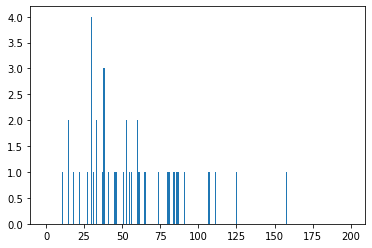

In [169]:
import pandas as pd
import numpy as np
from collections import Counter
from copy import copy
import matplotlib.pyplot as plt

cont = []
nom =  []
for i in range(200):
  cont.append(0)
  nom.append(i)

def ran():
  pref = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40]
  random.shuffle(pref)
  return list(pref)

mujer = []
for i in range(len(man_list)):
  mujer.append(ran())


def sel(num):
  global mujer
  ret = []
  for i in range(len(mujer)):
    ret.append(mujer[i][num])
  return ret
for k in range(len(man_list)):
  #Populating the interactive namespace from numpy and matplotlib
  #Define men and women data frames
  man_list = ['a0', 'b0', 'c0', 'd0','e0','f0','g0','h0','i0','j0','k0','l0','m0','n0','o0','p0','q0','r0','s0','t0','a1', 'b1', 'c1', 'd1','e1','f1','g1','h1','i1','j1','k1','l1','m1','n1','o1','p1','q1','r1','s1','t1']
  women_list = ['A0', 'B0', 'C0', 'D0','E0','F0','G0','H0','I0','J0','K0','L0','M0','N0','O0','P0','Q0','R0','S0','T0','A1', 'B1', 'C1', 'D1','E1','F1','G1','H1','I1','J1','K1','L1','M1','N1','O1','P1','Q1','R1','S1','T1']
  women_df = pd.DataFrame({'A0':ran(), 'B0':ran(), 'C0':ran(), 'D0':ran(),'E0':ran(),'F0':ran(),'G0':ran(),'H0':ran(),'I0':ran(),'J0':ran(),'K0':ran(),'L0':ran(),'M0':ran(),'N0':ran(),'O0':ran(),'P0':ran(),'Q0':ran(),'R0':ran(),'S0':ran(),'T0':ran(),'A1':ran(), 'B1':ran(), 'C1':ran(), 'D1':ran(),'E1':ran(),'F1':ran(),'G1':ran(),'H1':ran(),'I1':ran(),'J1':ran(),'K1':ran(),'L1':ran(),'M1':ran(),'N1':ran(),'O1':ran(),'P1':ran(),'Q1':ran(),'R1':ran(),'S1':ran(),'T1':ran()})

  women_df.index = man_list
  man_df = pd.DataFrame({'A0':sel(0), 'B0':sel(1), 'C0':sel(2), 'D0':sel(3),'E0':sel(4),'F0':sel(5),'G0':sel(6),'H0':sel(7),'I0':sel(8),'J0':sel(9),'K0':sel(10),'L0':sel(11),'M0':sel(12),'N0':sel(13),'O0':sel(14),'P0':sel(15),'Q0':sel(16),'R0':sel(17),'S0':sel(18),'T0':sel(19),'A1':sel(20), 'B1':sel(21), 'C1':sel(22), 'D1':sel(23),'E1':sel(24),'F1':sel(25),'G1':sel(26),'H1':sel(27),'I1':sel(28),'J1':sel(29),'K1':sel(30),'L1':sel(31),'M1':sel(32),'N1':sel(33),'O1':sel(34),'P1':sel(35),'Q1':sel(36),'R1':sel(37),'S1':sel(38),'T1':sel(39)})
  man_df.index = man_list
  women_df
  man_df
  #Gale-Shapley algorithm
  # dict to control which women each man can make proposals
  women_available = {man:women_list for man in man_list}
  # waiting list of men that were able to create pair on each iteration
  waiting_list = []
  # dict to store created pairs
  proposals = {}
  # variable to count number of iterations
  count = 0
  # while not all men have pairs
  while len(waiting_list)<len(man_list):
      # man makes proposals
      for man in man_list:
          if man not in waiting_list:
              # each man make proposal to the top women from it's list
              women = women_available[man]
              best_choice = man_df.loc[man][man_df.loc[man].index.isin(women)].idxmin()
              proposals[(man, best_choice)]=(man_df.loc[man][best_choice],
                                                  women_df.loc[man][best_choice])
      # if women have more than one proposals 
      # she will choose the best option
      overlays = Counter([key[1] for key in proposals.keys()])
      # cycle to choose the best options
      for women in overlays.keys():
          if overlays[women]>1:
              # pairs to drop from proposals
              pairs_to_drop = sorted({pair: proposals[pair] for pair in proposals.keys() 
                      if women in pair}.items(), 
                    key=lambda x: x[1][1]
                    )[1:]
              # if man was rejected by woman
              # there is no pint for him to make proposal 
              # second time to the same woman
              for p_to_drop in pairs_to_drop:
                  del proposals[p_to_drop[0]]
                  _women = copy(women_available[p_to_drop[0][0]])
                  _women.remove(p_to_drop[0][1])
                  women_available[p_to_drop[0][0]] = _women
      # man who successfully created pairs must be added to the waiting list 
      waiting_list = [man[-1] for man in proposals.keys()]
      # update counter
      count+=1
  
  print(count)
  print(proposals)
  cont[count] += 1
print (cont)
for i in range(len(cont)):
  if cont[i] != 0:
    min = i
    break
for i in range(len(cont)):
  if cont[-i] != 0:
    max = len(cont) - i
    break
prom = 0
for i in range(len(cont)):
  prom += i * int(cont[i])

print('\n')
print('Iteraciones minimas = '+ str(min))
print('\n')
print('Iteraciones maximas = '+ str(max))
print('\n')
print('Iteraciones promedio = '+ str(prom/100))
print('\n')
plt.bar(nom,cont)

